In [1]:
from keras.layers import Convolution2D

Using TensorFlow backend.


In [2]:
from keras.layers import MaxPooling2D

In [3]:
from keras.layers import Flatten

In [4]:
from keras.layers import Dense

In [5]:
from keras.models import Sequential

In [6]:
model=Sequential()

In [7]:
model.add(Convolution2D(filters=34 , kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 34)        952       
Total params: 952
Trainable params: 952
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(units=128 , activation='relu'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 34)        952       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 34)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32674)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4182400   
Total params: 4,183,352
Trainable params: 4,183,352
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Dense(units=1 , activation='sigmoid'))

In [14]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
from keras_preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'cnn_dataset/training_set/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        'cnn_dataset/test_set/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
model.fit(
        training_set,
        steps_per_epoch=8000,
        epochs=2,
        validation_data=test_set,
        validation_steps=800)

Found 8006 images belonging to 2 classes.
Found 1000 images belonging to 1 classes.
Epoch 1/2
8000/8000 [==============================] - 2635s 329ms/step - loss: 0.3797 - accuracy: 0.8228 - val_loss: 0.5199 - val_accuracy: 0.7350
Epoch 2/2
8000/8000 [==============================] - 2377s 297ms/step - loss: 0.1323 - accuracy: 0.9492 - val_loss: 0.7596 - val_accuracy: 0.7480


In [17]:
from keras.preprocessing import image

In [18]:
test_image = image.load_img('cnn_dataset/single_prediction/cat_or_dog_3.jpg', 
               target_size=(64,64))

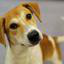

In [19]:
test_image

In [20]:
test_image = image.img_to_array(test_image)

In [21]:
type(test_image)

numpy.ndarray

In [22]:
test_image.shape

(64, 64, 3)

In [23]:
import numpy as np

In [24]:
test_image = np.expand_dims(test_image, axis=0)

In [25]:
test_image.shape

(1, 64, 64, 3)

In [26]:
result = model.predict(test_image)

In [27]:
result

array([[1.]], dtype=float32)

In [28]:
if result[0][0] == 1.0:
    print('dog')
else:
    print('cat')

dog


In [29]:
r = training_set.class_indices

In [30]:
r


{'cats': 0, 'dogs': 1}

In [31]:
model.get_weights()

[array([[[[-4.52755481e-01,  5.12846597e-02, -1.13342203e-01,
            5.52095063e-02,  1.89660087e-01, -2.63583690e-01,
            2.74559073e-02, -1.26123428e-01, -2.03930035e-01,
            1.05027393e-01, -3.04415673e-02, -2.15087056e-01,
           -2.12488528e-02, -2.09982976e-01,  1.01570159e-01,
           -1.82601973e-01,  1.24599203e-01, -1.04843177e-01,
           -2.19272897e-02,  1.82420220e-02, -1.10043384e-01,
           -6.24913834e-02,  9.13871601e-02,  2.05953151e-01,
            4.06720713e-02, -2.57294416e-01, -1.07730888e-01,
            6.10990115e-02, -1.83069855e-01,  2.27826804e-01,
           -1.09290868e-01, -3.11212659e-01, -1.64129689e-01,
            2.82524049e-01],
          [-5.93077838e-01, -2.54667521e-01,  3.81675325e-02,
           -1.77785113e-01,  1.35633964e-02, -1.79796264e-01,
           -1.02544621e-01,  4.17075343e-02, -1.10833071e-01,
           -1.33330911e-01,  9.96843055e-02, -4.29147184e-01,
           -1.73997775e-01, -9.44632590e-

In [35]:
model.save('cnn1_model.h5')

In [36]:
training_set.class_indices

{'cats': 0, 'dogs': 1}